# Assignment 3
This assignment has two questions:
 - Q1: Dense Neural Networks
 - Q2: Convolutional Neural Networks
 - Q3: Transfer learning

Utilize the designated cell within this notebook to complete the exercises. As for the Python exercises:
- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code (e.g., NumPy and Matplotlib library). You can use one of the two APIs to solve this notebook Pytorch or Tensorflow, fill the cells acording to your choice.
- Make sure that the output of all code cells is visible in your submitted notebook. **The evaluator will NOT execute your code before grading your submission.**
   
Please identify the authors of this assignment in the cell below.

# **Identification**

* **Name:** Pedro Lima
* **Student Number:** 202401143

* **Name:** Nelson Lorenzoni
* **Student Number:** 201800067


---


**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

For all the exercises, we will use the EuroSAT dataset. The authors of the dataset address the challenge of land use and land cover classification using Sentinel-2 satellite images. The Sentinel-2 satellite images are openly and freely accessible provided in the Earth observation program Copernicus. The dataset is composed of images consisting out of 10 classes with in total 27,000 labeled and geo-referenced images.

The EuroSAT dataset can be easily loaded using Pytorch or Tensorflow (run the cells that correnspond for your choice of API):

Image shape: torch.Size([3, 32, 32])
Minimum value of the input: tensor(0.2039)
Maximum value of the input: tensor(1.)


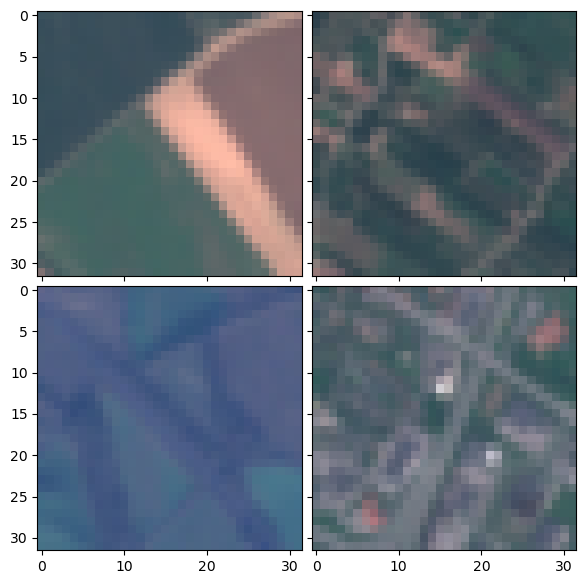

In [1]:
# If you use Pytorch:
import torch 
import torchvision
import matplotlib.pyplot as plt
import numpy as np


from torchvision.transforms.functional import to_pil_image
from tqdm import tqdm
from time import time

torch.manual_seed(42)

# Loading dataset
data = torchvision.datasets.EuroSAT(
    root="data",
    download=True,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize((32,32)), 
        torchvision.transforms.ToTensor()]
        ) 
)

train_set, test_set = torch.utils.data.random_split(data, [0.7, 0.3])

# Image examples
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(7, 7))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of Axes
                 axes_pad=0.1,  # pad between Axes in inch.
                 )

for ax, im in zip(grid, [to_pil_image(train_set[1][0]), to_pil_image(train_set[2000][0]), to_pil_image(train_set[4000][0]), to_pil_image(train_set[18000][0])]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

# Data already withing the range of [0,1]
print("Image shape: " + str(train_set[1][0].shape))
print("Minimum value of the input: " + str(train_set[1][0].min()))
print("Maximum value of the input: " + str(train_set[1][0].max()))

In [ ]:
# If you use Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
tf.get_logger().setLevel('INFO')

# Make sure to install ipywidgets before running this cell !!!! 
import ipywidgets

def transform_input(x):
    x = tf.cast(x, tf.float32)
    x = tf.image.resize(x, size=(32,32))
    return (x - tf.reduce_min(x))/(tf.reduce_max(x) - tf.reduce_min(x))

# Whole dataset 
ds, info = tfds.load('eurosat',split='train', download=True, as_supervised=True, with_info=True)
fig = tfds.show_examples(ds, info)

ds = ds.map(lambda x,y: (transform_input(x), y))
example = ds.take(1)
for x_example, y_example in example:
    print("Image shape: " + str(x_example.shape))
    print("Minimum value of the input: " + str(tf.math.reduce_min(x_example)))
    print("Maximum value of the input: " + str(tf.math.reduce_max(x_example)))

# Train split with batch size of 64
train_set = tfds.load('eurosat',split='train[0:70%]', download=True, as_supervised=True, batch_size=64)
train_set = train_set.map(lambda x,y: (transform_input(x), y))
# Test split with batch size of 64
test_set = tfds.load('eurosat',split='train[70%:]', download=True, as_supervised=True, batch_size=64)
test_set = test_set.map(lambda x,y: (transform_input(x), y))



## Question 01

Consider the network given by the image:

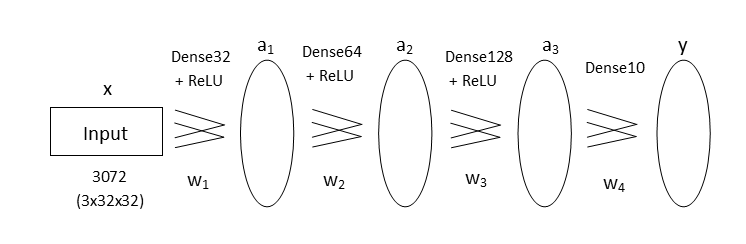


1 - A

Compute the number of parameters of this network (including bias). Show all your calculations to reach the final result.

*Your answer here*

First fc (Dense32):

- each neuron has 3072 weights (one for each input feature) plus 1 bias $\Rightarrow$ 3073 parameters per neuron

- total parameters: $32 * 3073 = 98336$

Second layer (Dense64):

- each neuron has 32 weights (one for each connection from the first layer) plus 1 bias $\Rightarrow$ 33 parameters per neuron

- total parameters: $64 * 33 = 2112$

Third layer (Dense128):

- each neuron has 64 weights (one for each connection from the second layer) plus 1 bias $\Rightarrow$ 65 parameters per neuron

- total parameters: $128 * 65 = 8320$

Last layer (Dense10):

- each neuron has 128 weights (one for each connection from the third layer) plus 1 bias $\Rightarrow$ 129 parameters per neuron

- total parameters: $10 * 129 = 1290$

Therefore, the total number of parameters for this network is: $98336+2112+8320+1290 = 110058$


1 - B

Using Pytorch or TensorFlow, complete one of the cells below to implement a model that follows the architecture previously described.

In [3]:
# If you use Pytorch
class DenseNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TO DO
        self.network = torch.nn.Sequential(
            torch.nn.Flatten(),  # 3x32x32 image to a vector of size 3072
            torch.nn.Linear(3072, 32, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10, bias=True)
        )

    def forward(self, x):
        # TO DO
        return self.network(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network = DenseNetwork().to(device)
network

DenseNetwork(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
# If you choose Tensorflow
class DenseNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # TO DO

    def call(self, x):
        # TO DO
        
        return 

network = DenseNetwork()
network.build(input_shape=(None,32,32,3))
network.summary()

1 - C 

Write the training loop to fit the network you previouly defined. Your function must receive as inputs the model, the data, the loss function (criterion), the optimizer and the number of epochs. You should also return the training and testing accuracy and loss for each epoch. Do this by completing the following cell.

In [4]:
# criterion here is the function that will be used to compute the loss
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_acc = []
    train_loss = []

    test_acc = []
    test_loss = []

    for i in tqdm(range(num_epochs)):
        tic = time()
        avg_train_acc = 0
        avg_train_loss = 0

        model.train()  # model to training mode

        for x,y in train_loader:
            # TO DO
            x, y = x.to(device), y.to(device)
            # forward pass
            output = model(x)
            loss = criterion(output, y)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # accuracy
            _, predicted = torch.max(output.data, 1)
            correct = (predicted == y).sum().item()
            acc = correct / y.size(0)
            avg_train_acc += acc
            # loss
            avg_train_loss += loss.item()
        
        # epoch average
        avg_train_acc /= len(train_loader)
        avg_train_loss /= len(train_loader)

        train_acc.append(avg_train_acc)
        train_loss.append(avg_train_loss)

        avg_test_acc = 0
        avg_test_loss = 0

        model.eval()  # model to evaluation mode

        with torch.no_grad():
            for x,y in test_loader:
                # TO DO
                x, y = x.to(device), y.to(device)
                output = model(x)
                loss = criterion(output, y)
                # accuracy
                _, predicted = torch.max(output.data, 1)
                correct = (predicted == y).sum().item()
                acc = correct / y.size(0)
                avg_test_acc += acc
                # loss
                avg_test_loss += loss.item()
        
        # epoch average
        avg_test_acc /= len(test_loader)
        avg_test_loss /= len(test_loader)
        
        test_acc.append(avg_test_acc)
        test_loss.append(avg_test_loss)

        toc = time()

        print(f'Epoch {i+1}/{num_epochs} - {toc-tic:.0f}s - Avg train loss: {avg_train_loss} - Avg train acc: {avg_train_acc} - Avg test loss: {avg_test_loss} - Avg test acc: {avg_test_acc}')        

    return train_acc, train_loss, test_acc, test_loss

1 - D

Using a batch size of 64, the Stochastic Gradient Descent optimizer with a learning rate of 1e-2 and the cross entropy as loss function, train your model for 10 epochs. After that, plot the evolution of the training and testing accuracy and loss. (Training should take no more than 15 min using CPU only).

In [5]:
# If you use Pytorch
# TO DO 

# In the dataloader you should enter your batch size
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

num_epochs = 10
learning_rate = 1e-2
opt = torch.optim.SGD(network.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

train_acc, train_loss, test_acc, test_loss = train_model(model=network, train_loader=train_dataloader, test_loader=test_dataloader, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

 10%|█         | 1/10 [00:23<03:31, 23.53s/it]

Epoch 1/10 - 24s - Avg train loss: 2.289870574667647 - Avg train acc: 0.1142208614864865 - Avg test loss: 2.2649780427377055 - Avg test acc: 0.14257983377077865


 20%|██        | 2/10 [00:36<02:16, 17.05s/it]

Epoch 2/10 - 13s - Avg train loss: 2.2133398901771857 - Avg train acc: 0.15161528716216216 - Avg test loss: 2.1411231821916235 - Avg test acc: 0.20084208223972003


 30%|███       | 3/10 [00:48<01:43, 14.84s/it]

Epoch 3/10 - 12s - Avg train loss: 2.028705203452626 - Avg train acc: 0.24891258445945944 - Avg test loss: 1.9071142551467175 - Avg test acc: 0.24855096237970253


 40%|████      | 4/10 [00:59<01:21, 13.52s/it]

Epoch 4/10 - 12s - Avg train loss: 1.8326533924083452 - Avg train acc: 0.3051625844594595 - Avg test loss: 1.8019366123544889 - Avg test acc: 0.28838582677165353


 50%|█████     | 5/10 [01:11<01:04, 12.83s/it]

Epoch 5/10 - 12s - Avg train loss: 1.7815453982031024 - Avg train acc: 0.30731630067567567 - Avg test loss: 1.7728658501557477 - Avg test acc: 0.2989938757655293


 60%|██████    | 6/10 [01:22<00:49, 12.41s/it]

Epoch 6/10 - 12s - Avg train loss: 1.7573807344243333 - Avg train acc: 0.31365076013513515 - Avg test loss: 1.8167106222918654 - Avg test acc: 0.289588801399825


 70%|███████   | 7/10 [01:34<00:36, 12.24s/it]

Epoch 7/10 - 12s - Avg train loss: 1.7295521900460527 - Avg train acc: 0.33052153716216215 - Avg test loss: 1.7376492342610999 - Avg test acc: 0.3239555993000875


 80%|████████  | 8/10 [01:46<00:24, 12.00s/it]

Epoch 8/10 - 11s - Avg train loss: 1.7013098835139662 - Avg train acc: 0.3474028716216216 - Avg test loss: 1.7386658463891096 - Avg test acc: 0.34604658792650916


 90%|█████████ | 9/10 [01:57<00:11, 11.88s/it]

Epoch 9/10 - 12s - Avg train loss: 1.6746948993689306 - Avg train acc: 0.3643264358108108 - Avg test loss: 1.6676358106568103 - Avg test acc: 0.3749863298337707


100%|██████████| 10/10 [02:09<00:00, 12.97s/it]

Epoch 10/10 - 12s - Avg train loss: 1.6481074122963726 - Avg train acc: 0.3814822635135135 - Avg test loss: 1.7225582900009757 - Avg test acc: 0.3500792869641295


In [ ]:
# If you use Tensorflow
num_epochs = 
opt = 
loss_fn = 

# Pay attention that the dataloader for Tensorflow was already defined (train_set and test_set) with batch_size = 64
train_acc, train_loss, test_acc, test_loss = train_model(model=network, train_loader=train_set, test_loader=test_set, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

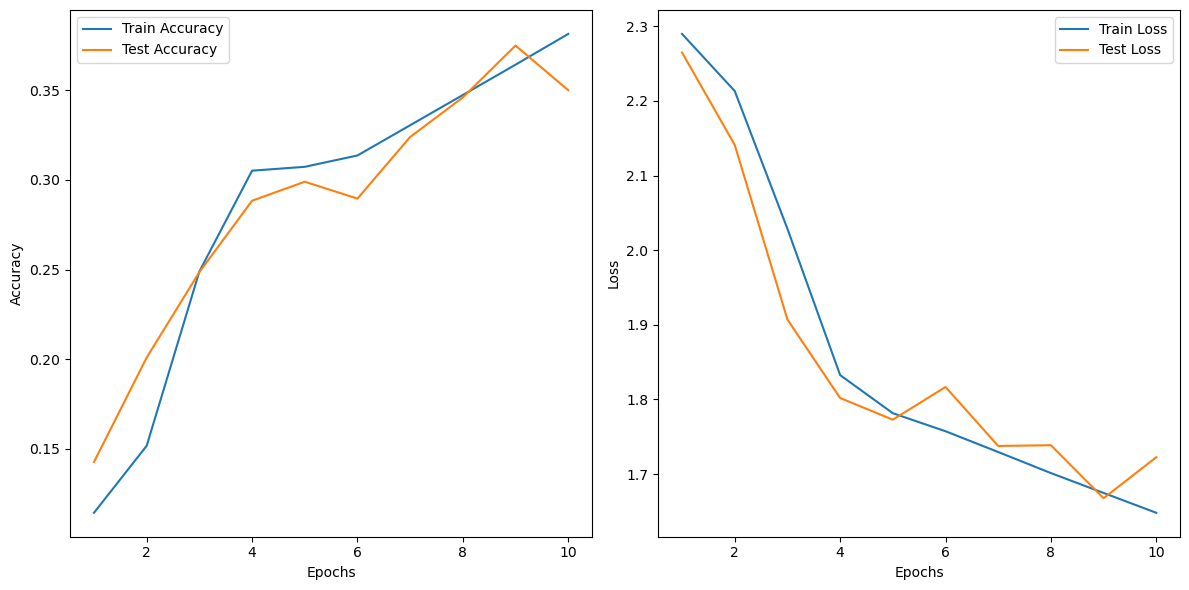

In [6]:
# TO DO: plot the evolution of the loss and accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

1-E 

In Pytorch, the weights are usually initialized following the uniform distribution given by $\mathcal{U}(-\sqrt{k}, \sqrt{k})$, where $k=\frac{1}{num\_features}$. In the current setup that we have, if instead we initialize the weights using the uniform distribution given by $\mathcal{U}(0,1)$, would you expect the network to performed better or worse? Would you change anything in the network architecture or in the input to improve performance?

*Your answer here*

We would expect the network to perform worse with $\mathcal{U}(0,1)$ initialization. The standard initialization scales the weights appropriately, helping to maintain the magnitude stable as it propagates through the network layers. Using the distribution given by $\mathcal{U}(0,1)$ may lead to unstable training dynamics (either exploding or vanishing gradients). As a consequence, the network may struggle to converge and might take longer to train or get stuck in suboptimal regions of the loss.

We propose two changes: (i) varying the learning rate by using a smaller initial value to prevent the weights from diverging too quickly and gradually increasing it as the network stabilizes; (ii) a network more complex (i.e. more layers or neurons) could improve performance, though this might lead to overfitting and should be done carefully.

## Question 2 - Convolutional Neural Network

Consider the network given by the image:

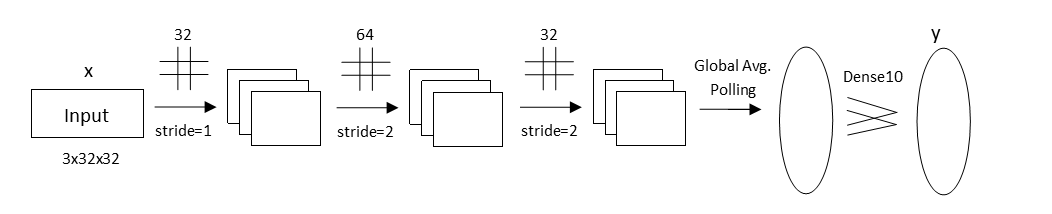


2 - A

Compute the number of parameters of this network (including bias). Show all your calculations to reach the final result. If we change the stride of all layers to 1, would the total number of parameters change? What about the shape of the activation maps (output of each convolutional layer)? 

*You answer here*

2 - B

Using Pytorch or Tensorflow, complete one of the cells below to implement a model that follows the architecture previously described. Consider that all the kernels are $3 \times 3$.

In [ ]:
# If you use Pytorch 
class ConvNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TO DO

    def forward(self, x):
        # TO DO

        return 
    
network_conv = ConvNetwork()
network_conv

In [ ]:
# If you use Tensorflow
class ConvNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # TO DO
    
    def call(self, x):
        # TO DO
        #  
        return 
    
network_conv = ConvNetwork()
network_conv.build(input_shape=(None,32,32,3))
network_conv.summary()

2 - C

Using the training function that you previously defined, train your convolutional neural network using a batch size of 64, the Stochastic Gradient Descent optimizer with a learning rate of 1e-2 and the cross entropy as loss function, train your model for 10 epochs. After that, plot the evolution of the training and testing accuracy and loss. (Training should take no more than 10 min using CPU only).

In [ ]:
train_dataloader = 
test_dataloader = 

num_epochs = 

opt = 
loss_fn = 

train_acc, train_loss, test_acc, test_loss = train_model(model=network_conv, train_loader=train_dataloader, test_loader=test_dataloader, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

In [ ]:
# If you use Tensorflow
num_epochs = 
opt = 
loss_fn = 

# Pay attention that the dataloader for Tensorflow was already defined (train_set and test_set) with batch_size = 64
train_acc, train_loss, test_acc, test_loss = train_model(model=network_conv, train_loader=train_set, test_loader=test_set, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

In [ ]:
# TO DO: Plot the evolution of the loss and accuracy

## Question 3: Transfer learning

Transfer learning is a technique in machine learning in which knowledge learned from a task is re-used in order to boost performance on a related task, which enable us to create new architectures based on models previously trained on large datasets. In this exercise, we will explore the use of a VGG16 network (https://arxiv.org/abs/1409.1556) pre-trained in the ImageNET dataset to perform predictions in our EuroSAT dataset. An overview of the VGG16 model is given in the figure below:

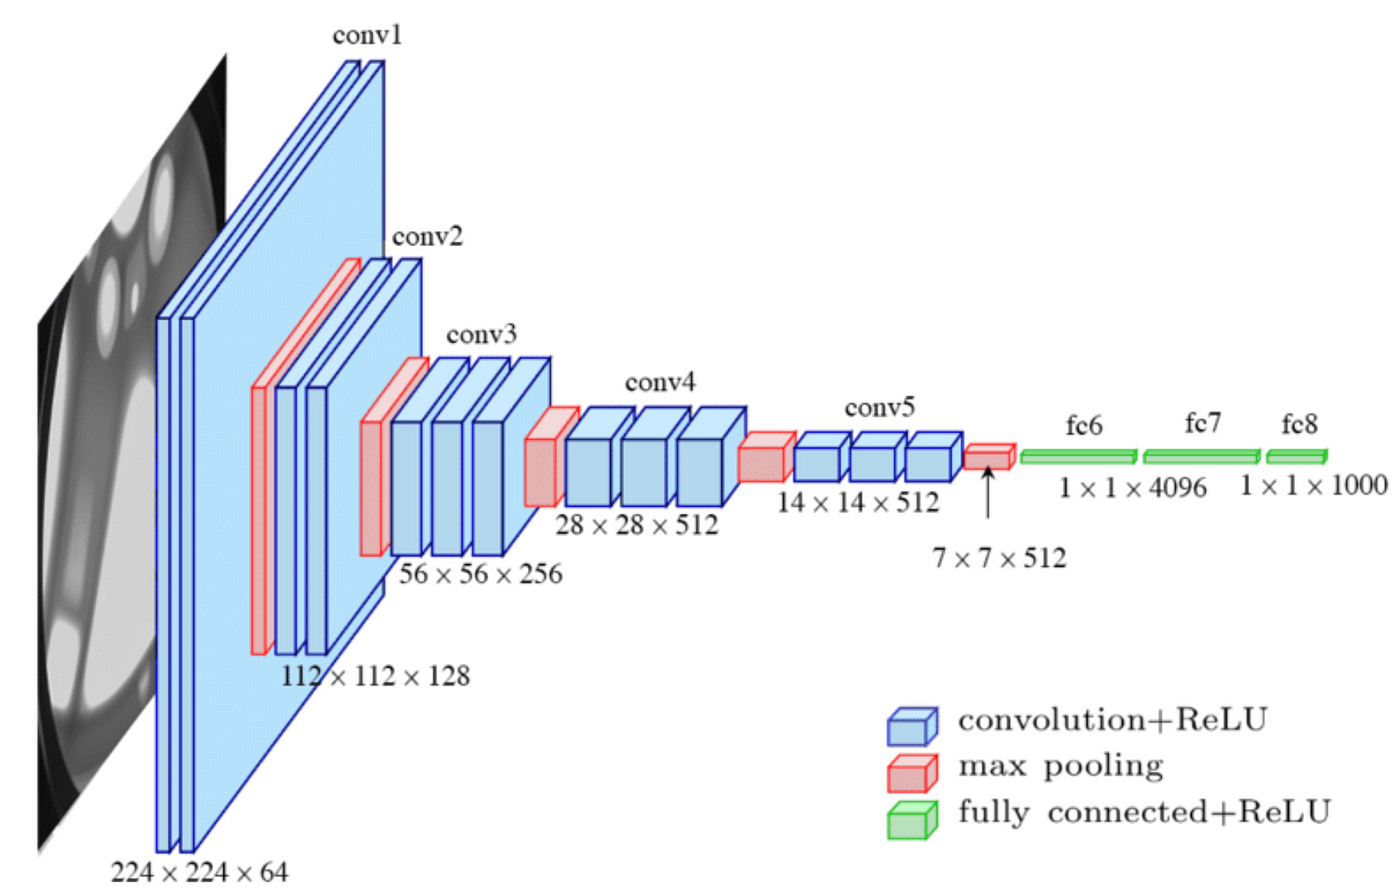


In order to transfer the knowledge of this trained model to our problem, we will use only the trained convolutional layers of the VGG16 to extract features that will serve as inputs for our new network. This can be done by replacing the fully connected layers of the VGG16 for new dense layers that will be trained using gradient descent while the convolutional layers are kept fronzen (meaning that their weights will not be updated during training).

Below, we have a schematic of the architecture that we will implement. The block label as VGG16 is composed only by convolutional layers.

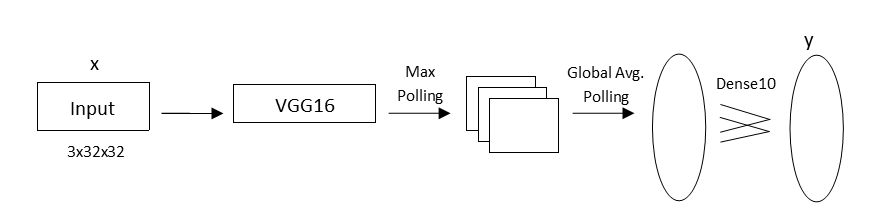


3 - A

Complete the cell below to implement the architecture previously described. The feature extraction part with the VGG16 is already described. You only need to implement the global average pooling and the final fully connected layer.

In [ ]:
# If you use Pytorch
from torchvision.models import vgg16

class TransferModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Frozen backbone
        self.backbone = vgg16(weights='DEFAULT')
        self.backbone = self.backbone.features[0:-2]
        for param in self.backbone.parameters():
            param.requires_grad = False

        self.max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

        # TO DO:        
        
    def forward(self, x):
        # Passing through the backbone
        self.z = self.backbone(x)
        a = torch.nn.functional.relu(self.z)
        a = self.max_pool(a)        

        # TO DO:                
        return 
    
    def get_activation(self, x):
        return self.backbone(x).detach().cpu().numpy()


In [ ]:
# If you use Tensorflow
class TransferModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.backbone = tf.keras.applications.VGG16(include_top=False)
        self.backbone.trainable = False

        #TO DO         
    
    def call(self, x):
        x = self.backbone(x)
        x = tf.reshape(x, (-1,512))
        # TO DO 
        
        return 
    
    def get_activation(self, x):
        pre_act = tf.keras.Model(inputs=self.backbone.input, outputs=[self.backbone.get_layer('block5_conv3').input])(x)        
        kernel = self.backbone.get_layer('block5_conv3').kernel
        return tf.nn.conv2d(pre_act,kernel,1,padding='SAME').numpy()
    
network_transfer = TransferModel()
network_transfer.build(input_shape=(None, 32,32,3))
network_transfer.summary()

3 - B

Using the training function that you previously defined, train your convolutional neural network using a batch size of 64, the Stochastic Gradient Descent optimizer with a learning rate of 1e-2 and the cross entropy as loss function, train your model for 5 epochs. After that, plot the evolution of the training and testing accuracy and loss. (Training should take no more than 30 min using CPU only).

In [ ]:
network_transfer = TransferModel()

train_dataloader = 
test_dataloader = 

num_epochs = 

opt = 
loss_fn = 

train_acc, train_loss, test_acc, test_loss = train_model(model=network_transfer, train_loader=train_dataloader, test_loader=test_dataloader, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

In [ ]:
# If you use Tensorflow
num_epochs = 
opt = 
loss_fn = 

# Pay attention that the dataloader for Tensorflow was already defined (train_set and test_set) with batch_size = 64
train_acc, train_loss, test_acc, test_loss = train_model(model=network_transfer, train_loader=train_set, test_loader=test_set, criterion=loss_fn, optimizer=opt, num_epochs=num_epochs)

In [ ]:
# Plot the evolution of loss and accuracy

3 - C

Comparing the performance of all tested models, which one would you choose to deploy? Justify your answer.

*Your answer here*

3 - D

Our implemented model has a method called *get_activations* that returns the output of the last convolutional layer of the vgg16 before activation. We can use it to compute the activations of a batch of images $x_{test}$, as shown in the cells below:

In [ ]:
# If you use Pytorch 
x_test = next(iter(test_dataloader))[0]
z = network_transfer.get_activation(x_test)
z.shape

In [ ]:
# If you are using Tensorflow
x_test = next(iter(test_set))[0]
z = network_transfer.get_activation(x_test)
z.shape

You should now flatten the $z$ variable, so its new shape must be $(1 \times 64*512*2*2)$. After that, use the histogram method with 100 bins to esimate the pdf of the flattened version of $z$. Does it remind you of any particular distribution? Estimate the parameters of this distribution and overlay in one plot the pdf estimated using the histogram and the one you obtained using a parametric approach.

In [ ]:
# TO DO